In [ ]:
# load the data
import json

from bench.utils import REPO_ROOT

settings = ["closedbook", "openbook", "wiki-provided"]
setting_names = ["Closed Book", "Open Book", "Evidence Provided"]
models = ["llama-chat", "gpt-4", "gpt-3.5-turbo", "mistral-chat", "mixtral", "gpt-4-turbo", "claude"]
model_names = ["LLaMA 2", "GPT-4", "GPT-3.5-turbo", "Mistral-7B", "Mixtral-8x7B", "GPT-4-turbo", "Claude 2.1"]

results_loose = {k: [] for k in setting_names}
results_model = {k: [] for k in setting_names}

# def print_one(fp):
#     with open(fp) as f:
#         scores = json.load(f)
#     acc = scores["acc"]["acc"]
#     perf = scores["acc"]["perfect"]
#     r1p = scores["rouge"]["rouge1"]["precision"]
#     r1r = scores["rouge"]["rouge1"]["recall"]
#     r1f = scores["rouge"]["rouge1"]["fscore"]
#     r2p = scores["rouge"]["rouge2"]["precision"]
#     r2r = scores["rouge"]["rouge2"]["recall"]
#     r2f = scores["rouge"]["rouge2"]["fscore"]
#     rLp = scores["rouge"]["rougeL"]["precision"]
#     rLr = scores["rouge"]["rougeL"]["recall"]
#     rLf = scores["rouge"]["rougeL"]["fscore"]
#     bleurt = scores["bleurt"]
#     gptscore = scores["gpt"]
#     print(",".join(map(str, (acc, perf, r1p, r1r, r1f, r2p, r2r, r2f, rLp, rLr, rLf, bleurt, gptscore))))


for setting, setting_name in zip(settings, setting_names):
    for model, model_name in zip(models, model_names):
        result_path = REPO_ROOT / f"results/score-{setting}-{model}.json"
        with open(result_path) as f:
            scores = json.load(f)
        loose = scores["acc"]["acc"]
        results_loose[setting_name].append(loose)
        results_model[setting_name].append(scores["gpt"])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# liam code
def show_values(axs, orient="v", space=.01, label_thresh=0):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height()*100)
                if p.get_height() >= label_thresh:
                    ax.text(_x, _y, value, ha="center", fontsize=11) #, rotation=40)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

# # Put the intended figsize here
# fig, ax = plt.subplots(figsize=(5,2.8))
# 
# # Put your dataframe here 
# sns.barplot(ax=ax, data=df, y='accuracy', x='model', hue='chat')
# 
# # Can customize legend here
# ax.legend(loc='upper right', ncol=2, fontsize=12, columnspacing=0.5, labelspacing=0.3, handlelength=1.5, handletextpad=0.4, fancybox=False)


# # Set size of text and other things
# ax.xaxis.set_tick_params(labelsize=14)
# 
# # Set no printing of axis label and set y limits
# ax.set(xlabel=None)
# ax.set(ylim=(0.0, 0.6))

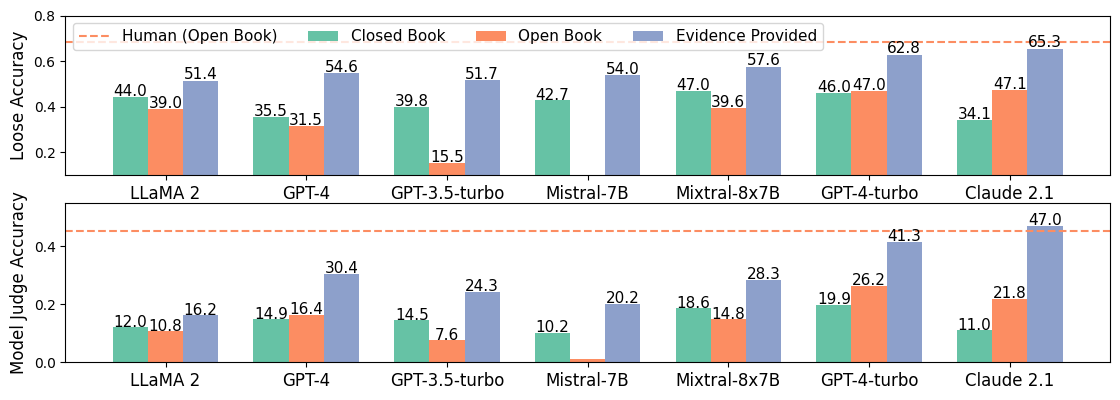

In [48]:
import matplotlib as mpl

x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
colors = mpl.colormaps["Set2"].colors

fig, axs = plt.subplots(2, 1, figsize=(11, 3.8))

ax = axs[0]
for idx, (attribute, measurement) in enumerate(results_loose.items()):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=colors[idx])
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Loose Accuracy', fontsize=12)
# ax.set_title('Accuracy by Model and Task')
ax.set_xticks(x + width, model_names, fontsize=12)

# human perfomance
ax.axhline(y=0.6853, label="Human (Open Book)", color=colors[1], linestyle="--")
ax.set_ylim(0.1, 0.8)

# ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.6), fontsize=11)
ax.legend(loc='upper left', ncols=4, fontsize=11)

# Call cursed function
show_values(ax, label_thresh=0.1)

# ===== do it again =====
width = 0.25  # the width of the bars
multiplier = 0
ax = axs[1]
for idx, (attribute, measurement) in enumerate(results_model.items()):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=colors[idx])
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Model Judge Accuracy', fontsize=12)
ax.set_xticks(x + width, model_names, fontsize=12)
ax.set_ylim(0, 0.55)

# human perfomance
ax.axhline(y=0.4519, label="Human (Open Book)", color=colors[1], linestyle="--")

# Call cursed function
show_values(ax, label_thresh=0.015)

plt.subplots_adjust(hspace=0.15)

plt.tight_layout(pad=0)
plt.savefig("viz.pdf")
plt.show()
